# Work Description
 In the previous notebook, we introduced the dataset about Customer Segments Classification, conducted an exploratory data analysis and in deepth analysis of the missing data. In the follow, we recall some elements of this dataset description :
  - ID: Unique ID
  - Gender: Gender of the customer
  - Ever_Married: Marital status of the customer
  - Age: Age of the customer
  - Graduated: Is the customer a graduate?
  - Profession: Profession of the customer
  - Work_Experience: Work Experience in years
  - Spending_Score: Spending score of the customer
  - Family_Size: Number of family members for the customer (including the customer)
  - Var_1: Anonymised Category for the customer
  - Segmentation: Target -> Customer Segment of the customer

### Problem Definition

We recall that the objective of this project is to train a machine learning model to classify customers into existing segments based on the provided features. Specifically, we will be tackling a multi-class classification problem. Our target variable, 'Segmentation', is categorical with four possible values representing customer segments: A, B, C, and D.

The Exploratory Data Analysis (EDA) of this dataset has revealed several issues that need to be addressed during the training of our machine learning model:

- **Class Imbalance**: The distribution of classes is skewed, with one class being significantly dominant.
- **Missing Data**: There are missing values, and a high dependency between variables with missing data and other variables.
- **Data Inaccuracies**: Inconsistencies have been found in the 'Graduated' column. Customers in professions typically requiring advanced degrees, such as Doctor, Engineer, Lawyer, Executive, and Healthcare, are paradoxically marked as 'Not Graduated', even when they have substantial work experience.
- **Moderate Correlation**: The Cramer's V correlation matrix has shown a moderate correlation between the target variable 'Segmentation' and other categorical variables, indicating some level of association but not strong enough to be the sole predictors.

We will pay special attention to these issues when training and experimenting with different machine learning models to solve our problem. We will particularly try to :
- Correct data inaccuracies, particularly in the 'Graduated' column, to ensure that our model is trained on accurate information.
- Develop robust strategies for imputing missing data, taking into account the relationships between variables.
- Implement techniques to handle class imbalance, such as resampling methods or using algorithms that can adjust for imbalance.
- Explore feature engineering and selection methods to enhance the predictive power of moderately correlated variables.
- Compare different machine learning models and try to tune them.

By addressing these challenges, we can improve the accuracy and reliability of our machine learning model, leading to more effective customer segmentation.

# Work plan
In this notebook, we will carry on the plan we set in the first part of this project. We have initially followed standard procedures for data preparation, modeling tailored to address multi-class classification challenges, then comparing different data preparation strategies and different machine learning models. Subsequently, we iteratively refined our approach based on the insights gained and findings from our analysis. The finalized plan of our work is outlined as follows:

1. Data Preprocessing for Training: Prepare the dataset for model training by handling missing values, encoding categorical and ordinal variables, and scaling features as necessary.

2. Model Evaluation with ML Models: Evaluate the performance of various machine learning models on the dataset using appropriate metrics and techniques.

3. Clustering and Re-segmentation Analysis: Explore clustering techniques to re-segment the data and assess the effectiveness of alternative segmentation approaches.

7. Conclusion and Future Improvements: Summarize key findings, draw conclusions from the analysis, and propose potential avenues for further research and improvement.



In [2]:
!pip install shap

  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
   ---------------------------------------- 0.0/455.7 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/455.7 kB 1.7 MB/s eta 0:00:01
   -------------------------------- ------- 368.6/455.7 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 455.7/455.7 kB 4.7 MB/s eta 0:00:00
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.4/2.7 MB 7.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.7 MB 8.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.7 MB 8.6 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.7 MB 7.7 MB/s eta 0:00:01
   ------------------------- -------------- 1.7/2.7 MB 7.9 MB/s eta 0:00:01
   ---

In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.3/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.6/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.8/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 1.0/99.8 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.4/99.8 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 1.9/99.8 MB 5.7 MB/s eta 0:00:18
    --------------------------------------- 2.3/99.8 MB 6.3 MB/s eta 0:00:16
   - -------------------------------------- 2.5/99.8 MB 6.5 MB/s eta 0:00:15
   - -------------------------------------- 3.0/99.8 MB 6.7 MB/s eta 0:00:15
   - ----

In [12]:
!pip install yellowbrick

In [6]:
!pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --------- ------------------------------ 61.4/258.3 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 245.8/258.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.3 MB/s eta 0:00:00


In [7]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 2.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 3.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 4.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00


In [9]:
!pip install distutils-pytest

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/339.9 kB ? eta -:--:--
   --- ------------------------------------ 30.7/339.9 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 204.8/339.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 339.9/339.9 kB 3.0 MB/s eta 0:00:00
  Created wheel for distutils-pytest: filename=distutils_pytest-0.2.1-py3-none-any.whl size=8000 sha256=cbd594109188de88da13000ee2890e1766eb8cddba59a07656236990338a090e
  Stored in directory: c:\users\nourh\appdata\local\pip\cache\wheels\ea\61\dc\8d3d159

In [75]:
from __future__ import absolute_import, print_function, division
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as mno
from scipy import stats


from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, adjusted_rand_score, silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
import shap
sns.set_theme(style="whitegrid", palette="Set2")
%matplotlib inline


# Task 1. Loading and describing the data

### 1.1 Loading and describing the training data

Reading the data from my Drive using Google drive

In [4]:
train = pd.read_csv('./data/new_train.csv', sep=';')

In [5]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,466645,Male,Yes,66,Yes,Lawyer,5.0,Low,2.0,Cat_6,C
1,462521,Female,No,33,No,Homemaker,9.0,Low,1.0,Cat_6,A
2,461679,Male,No,28,Yes,Healthcare,4.0,Low,4.0,Cat_6,D
3,461644,Male,No,31,No,Healthcare,1.0,Low,6.0,Cat_6,B
4,461889,Male,Yes,42,Yes,Artist,2.0,Average,2.0,Cat_6,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8003 entries, 0 to 8002
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8003 non-null   int64  
 1   Gender           8003 non-null   object 
 2   Ever_Married     7869 non-null   object 
 3   Age              8003 non-null   int64  
 4   Graduated        7929 non-null   object 
 5   Profession       7876 non-null   object 
 6   Work_Experience  7200 non-null   float64
 7   Spending_Score   8003 non-null   object 
 8   Family_Size      7666 non-null   float64
 9   Var_1            7922 non-null   object 
 10  Segmentation     8003 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 687.9+ KB


From the above tables, we can notice that :
- Many columns have missing data (6 out of 10)
- Most of the columns (6 out of 10) represent qualitative variables a.k.a categorical ones.
- The customer ID is an integer used as a reference identifier, not as a meaningful numerical value.

In [8]:
train.isna().sum()

ID                   0
Gender               0
Ever_Married       134
Age                  0
Graduated           74
Profession         127
Work_Experience    803
Spending_Score       0
Family_Size        337
Var_1               81
Segmentation         0
dtype: int64

The above table of missing data asserts our previous observation. Multiple features in our dataset have missing values. The level of missingness varies across the features. We will dedicate a section for a deeper analysis of these missing data. First, we must further explore our dataset and understand its features.

In [9]:
#describing numerical columns
train.drop('ID', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8003.0,43.461077,16.753915,18.0,30.0,40.0,53.0,89.0
Work_Experience,7200.0,2.660972,3.429512,0.0,0.0,1.0,4.0,14.0
Family_Size,7666.0,2.853118,1.532369,1.0,2.0,3.0,4.0,9.0


By checking the above table, we didn't notice extreme values for the numerical variables (Age, Work_Experience, Family_Size)

In [10]:
#describing categorical columns
train.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8003,7869,7929,7876,8003,7922,8003
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,A
freq,4383,4614,4882,2488,4835,5168,3433


In [11]:
train['Segmentation'].value_counts()

Segmentation
A    3433
D    1705
C    1496
B    1369
Name: count, dtype: int64

We can notice that :
- There is 3 binary columns.
- The cadinality of 'Profession' and 'Var_1' are relatively moderate
- Our target column 'Segmentation' is multi-class : 4 values

##### Check duplicated rows

In [12]:
train.duplicated().sum()

0

##### Checking duplication of Customers *ID*

In [13]:
len(train.ID.unique()) == train.shape[0]

False

No duplicated rows. Each row stands for a uniquely represented Customer in the dataset.

## 1.2 Loading and describing the testing data

In [15]:
#Reading the data
#ID+Featues
print("#Loading the Testing data : \n")
test = pd.read_csv('./data/new_test.csv', sep=";")
print(test.info())
print("\n\n")
test.head()

#Loading the Testing data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2668 non-null   int64  
 1   Gender           2668 non-null   object 
 2   Ever_Married     2615 non-null   object 
 3   Age              2668 non-null   int64  
 4   Graduated        2640 non-null   object 
 5   Profession       2634 non-null   object 
 6   Work_Experience  2377 non-null   float64
 7   Spending_Score   2668 non-null   object 
 8   Family_Size      2560 non-null   float64
 9   Var_1            2642 non-null   object 
 10  Segmentation     2668 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 229.4+ KB
None





,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,464369,Male,Yes,36,Yes,Executive,1.0,High,4.0,Cat_6,B
1,464013,Male,No,27,No,Healthcare,0.0,Low,1.0,Cat_6,D
2,463030,Male,Yes,52,Yes,Executive,1.0,High,3.0,Cat_6,A
3,467352,Male,Yes,45,Yes,Executive,0.0,High,4.0,Cat_6,A
4,461060,Male,Yes,59,Yes,Executive,1.0,High,5.0,Cat_6,C


In [16]:
test.isna().sum()

ID                   0
Gender               0
Ever_Married        53
Age                  0
Graduated           28
Profession          34
Work_Experience    291
Spending_Score       0
Family_Size        108
Var_1               26
Segmentation         0
dtype: int64

The testing dataset, much like the training dataset, contains missing values spread across various columns. The proportions of missing data in the testing set are quite similar to those observed in the training set, indicating a consistent pattern of missingness.

In [17]:
test.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,2668,2615,2640,2634,2668,2642,2668
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,A
freq,1451,1538,1673,826,1641,1733,1142


In [18]:
test['Segmentation'].value_counts()

Segmentation
A    1142
D     563
B     489
C     474
Name: count, dtype: int64

# Task 2. Data preprocessing for the modeling

## 2.1 Create data cleaning pipline

In the previous section, we applied step-by-step imputation strategies to variables with missing data. Now, we will define an imputation pipeline to automate these steps and include them in our final model. This is crucial as we have a separate testing dataset, and we must ensure that the same preprocessing steps are consistently applied to both datasets.

Based on our previous analysis (part 1 of this project), we have decided on the following imputation strategy, which considers the specific characteristics of data missingness in the different variables of our dataset:

Based on our previous analysis, we have decided on the following imputation strategy, which considers the specific characteristics of data missingness in the different variables of our dataset:

1. **Variable 'Var_1'**:
    - **Missing Data**: Less than 1%, categorical features.
    - **Missingness Type**: Missing Completely at Random (MCAR).
    - **Imputation Strategy**: Impute missing values by replacing them with the most frequent value (the mode) of this variable.

2. **Variables 'Ever_Married' and 'Profession'**:
    - **Missing Data**: Less than 2%, categorical features.
    - **Missingness Type**: Missing at Random (MAR).
    - **Imputation Strategy**: The absence of values in these variables may stem from the lack of suitable categories that accurately capture individuals' situations at the time of data collection. For example, individuals who are in a relationship but not formally married or those who are unemployed might not find appropriate categories in the dataset. Hence, we decided to create a new category by treating missing values as a separate case. Encode missing values as 'Unknown' to preserve the information that the value was missing

3. **Variables 'Family_Size' and 'Work_Experience'**:
    - **Missing Data**: Medium to high.
    - **Missingness Type**: Potentially Missing at Random (MAR).
    - **Imputation Strategy**: Apply Iterative Imputation, which considers the values of other variables to fill the missing data. Further explanation about the Iterative Imputation algorithm in Scikit-learn can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html).
4. **The special case of the variable 'Graduated'**:
    - **Missing Data**: Less than 1%, categorical features.
    - **Missingness Type**: Missing at Random (MAR) with no relatedness to our target variable Segmentation
    - **Inaccurcies** : Inexplicable inaccuracies was detected in this variable data (doctors, lawyers with high work experience are marked as not graduated) which may negatively affect the performance of our predictive model. In the other hand, this variable has a moderate positive correlation (0.32) with our target variable 'Segmentation'.
    - **Cleaning Strategy**: Handling the 'Graduated' variable requires a mix of imputation and correction. The goal is to ensure that the variable's valuable information is retained while minimizing the impact of errors. These steps should be integrated into your data preprocessing pipeline to improve the performance of your predictive model. We choose to use a Rule-Based Correction strategy: implement rules to correct obvious inaccuracies. For instance, we assume that doctors, lawyers, and other professions typically requiring advanced degrees should be marked as 'Graduated' if their work experience is significant (e.g., >5 years). We will also appy a simple imputation solution to the missing data. We will fill the missing values based by using a placeholder ('Unknown'). 
    

Next, we will consolidate all the steps into one preprocessing pipeline.

### Correction transformer for 'Graduated' variable

In [64]:
#Class to create a special transformer to correct the Graduated values
class GraduationCorrectionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, professions=None, experience_threshold=5):
        self.professions = professions if professions is not None else ['Doctor', 'Lawyer', 'Engineer', 'Executive', 'Healthcare']
        self.experience_threshold = experience_threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Graduated'] = X_copy.apply(self.correct_graduation_status, axis=1)
        return X_copy

    def correct_graduation_status(self, row):
        if row['Profession'] in self.professions and row['Work_Experience'] > self.experience_threshold:
            return 'Yes'
        return row['Graduated']

In [68]:
 # Create the final transformer
preprocessing_pipeline = Pipeline(steps=[
    ('graduation_correction', GraduationCorrectionTransformer()),
    # Add other preprocessing steps here (e.g., imputation, scaling)
])

df_corrected = preprocessing_pipeline.fit_transform(train)
df_corrected.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,466645,Male,Yes,66,Yes,Lawyer,5.0,Low,2.0,Cat_6,C
1,462521,Female,No,33,No,Homemaker,9.0,Low,1.0,Cat_6,A
2,461679,Male,No,28,Yes,Healthcare,4.0,Low,4.0,Cat_6,D
3,461644,Male,No,31,No,Healthcare,1.0,Low,6.0,Cat_6,B
4,461889,Male,Yes,42,Yes,Artist,2.0,Average,2.0,Cat_6,C


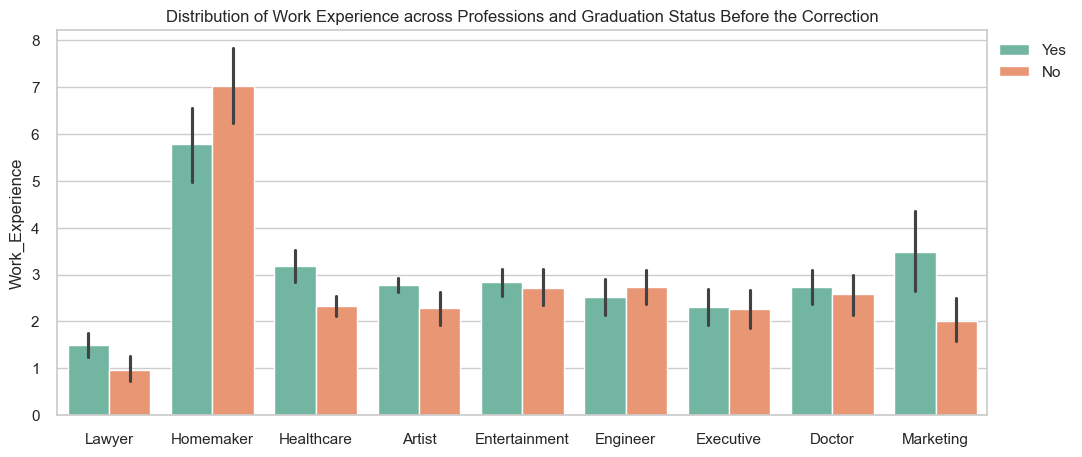

In [84]:
plt.figure(figsize=(12,5))
sns.barplot(train, x='Profession', y='Work_Experience', hue='Graduated' )
plt.title('Distribution of Work Experience across Professions and Graduation Status Before the Correction')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel('')
plt.show()

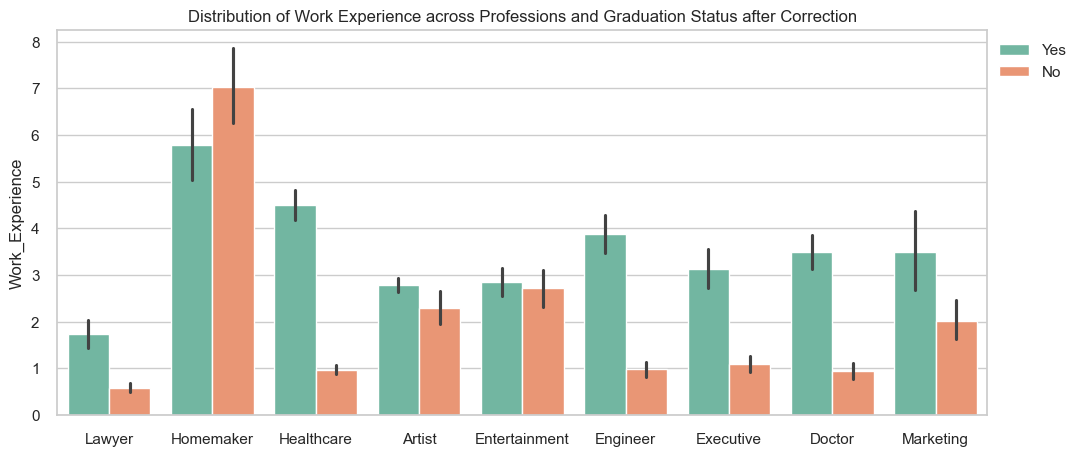

In [70]:
plt.figure(figsize=(12,5))
sns.barplot(df_corrected, x='Profession', y='Work_Experience', hue='Graduated' )
plt.title('Distribution of Work Experience across Professions and Graduation Status after the Correction')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel('')
plt.show()

By comparing the plots before and after the graduation correction, we can the notice the increase of the number of 'Graduated' customers working as 'Doctor', 'Engineer', Healthcare', 'Lawyer' or 'Executive'

### Imputation pipeline

In [125]:
#A generic function to create the data cleaning pipeline.
#Steps in this pipeline are incrementally added depending on the features passed as parameters
def create_imputation_transformer(featues_drop, feat_unknown_imputer, feat_frequency, feat_iterative_imputer) :
  transformers = []
  # Check if the feature lists are not empty and add respective transformers
  if featues_drop:
    transformers.append(('drop_columns', 'drop', featues_drop))
  if feat_unknown_imputer:
    transformers.append(('unknown_impute', SimpleImputer(strategy='constant', fill_value='Unknown'), feat_unknown_imputer ))
  if feat_frequency:
    transformers.append(('frequency', SimpleImputer(strategy='most_frequent'), feat_frequency))
  if feat_iterative_imputer :
    transformers.append(('iterative_imputer', IterativeImputer(), feat_iterative_imputer))

  if not transformers:
      raise ValueError("At least one feature list must be non-empty to create the imputation pipeline.")

  # Create the final transformer
  cleaning_transformer = ColumnTransformer(
      transformers=transformers,
      remainder='passthrough',
      verbose_feature_names_out=False
  )
  cleaning_transformer.set_output(transform="pandas")

  return cleaning_transformer

In [126]:
# Define the feature columns, we maintained the ID column since we need to use it as index for testing purpose
features_to_drop = None
features_unknown_impute = ['Ever_Married', 'Profession', 'Graduated']
features_freq_imputer=['Var_1']
features_iterative_impute = ['Work_Experience', 'Family_Size']

cleaning_transformer = create_imputation_transformer(features_to_drop, features_unknown_impute, features_freq_imputer, features_iterative_impute)

In [127]:
#Inspecting the data cleaning pipeline
cleaning_pipeline = Pipeline(steps=[
    ('cleaner', cleaning_transformer)
])
df_cl= cleaning_pipeline.fit_transform(train)

In [128]:
print(df_cl.info())
print(df_cl.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8003 entries, 0 to 8002
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ever_Married     8003 non-null   object 
 1   Profession       8003 non-null   object 
 2   Graduated        8003 non-null   object 
 3   Var_1            8003 non-null   object 
 4   Work_Experience  8003 non-null   float64
 5   Family_Size      8003 non-null   float64
 6   ID               8003 non-null   int64  
 7   Gender           8003 non-null   object 
 8   Age              8003 non-null   int64  
 9   Spending_Score   8003 non-null   object 
 10  Segmentation     8003 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 687.9+ KB
None
Ever_Married       0
Profession         0
Graduated          0
Var_1              0
Work_Experience    0
Family_Size        0
ID                 0
Gender             0
Age                0
Spending_Score     0
Segmentation    

## 2.2 Create data encoding and scaling pipeline

In the first part of this project, we found that the numerical variables of our dataset do not follow a normal distribution. This insight is crucial as it will influence our choice of scaling methods during the data preprocessing phase before training the model. Specifically, we will discard standard normalization techniques which assume normality like StandardScaler and Normalizer and opt for scaling techniques better suited for non-normally distributed data, such as Min-Max scaling or Robust scaling. Further, we have highlighted the presence of outliers at the different numerical variables. By considering all of these facts, we choose to use the Robust scaling method since its the suited to handle our data. In the other hand, we choose to encode categorical features using OneHotEncoder and the ordinal variables ('Spending_Score') using OrdinalEncoder.

* **Robust Scaler**
The RobustScaler removes the median and scales the data according to the IQR:
  - Centering by Median: Subtracts the median from each feature. This centers the data around zero.
  - Scaling by IQR: Divides the data by the IQR, which is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile).

In [76]:
#A generic function to create a pipeline for data encoding and scaling
def create_encoding_pipeline(features_ohe_encode, features_ord_cat, features_scale):
    transformers = []

    # Check if the feature lists are not empty and add respective transformers
    if features_ohe_encode:
        transformers.append(('cat_enc', OneHotEncoder(handle_unknown='ignore', sparse_output=False), features_ohe_encode))

    if features_ord_cat: #ordinal features must be joined to its list of categories
        for feature, categories in features_ord_cat.items():
            transformers.append(('ord_enc_' + feature, OrdinalEncoder(categories=[categories]), [feature]))

    if features_scale:
        transformers.append(('scaling', RobustScaler(), features_scale))

    if not transformers:
        raise ValueError("At least one feature list must be non-empty to create an encoding pipeline.")

    # Create the final transformer
    encoder = ColumnTransformer(
        transformers=transformers,
        remainder='passthrough',
        verbose_feature_names_out=False
    )
    encoder.set_output(transform="pandas")

    return encoder

In [77]:
#Features for one hot encoding
cat_features = ['Gender', 'Ever_Married', 'Profession', 'Var_1', 'Graduated']
#Features for ordinal encoding
ord_features_categories = {
    'Spending_Score': ['Low', 'Average', 'High']
}
#Features to scale
num_features = ['Age', 'Work_Experience', 'Family_Size']

encoder = create_encoding_pipeline(cat_features,ord_features_categories, num_features)

In [78]:
#Inspecting the pipeline output
data_enc=encoder.fit_transform(train.dropna())
data_enc.head()

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,...,Var_1_Cat_6,Var_1_Cat_7,Graduated_No,Graduated_Yes,Spending_Score,Age,Work_Experience,Family_Size,ID,Segmentation
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.136364,1.00,-0.5,466645,C
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,-0.363636,2.00,-1.0,462521,A
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,-0.590909,0.75,0.5,461679,D
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-0.454545,0.00,1.5,461644,B
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.045455,0.25,-0.5,461889,C


In [82]:
data_enc[num_features].describe()

,Age,Work_Experience,Family_Size
count,6609.000000,6609.000000,6609.000000
mean,0.111013,0.412468,-0.073007
std,0.752880,0.856934,0.767258
min,-1.045455,-0.250000,-1.000000
25%,-0.454545,-0.250000,-0.500000
50%,0.000000,0.000000,0.000000
75%,0.545455,0.750000,0.500000
max,2.181818,3.250000,3.000000


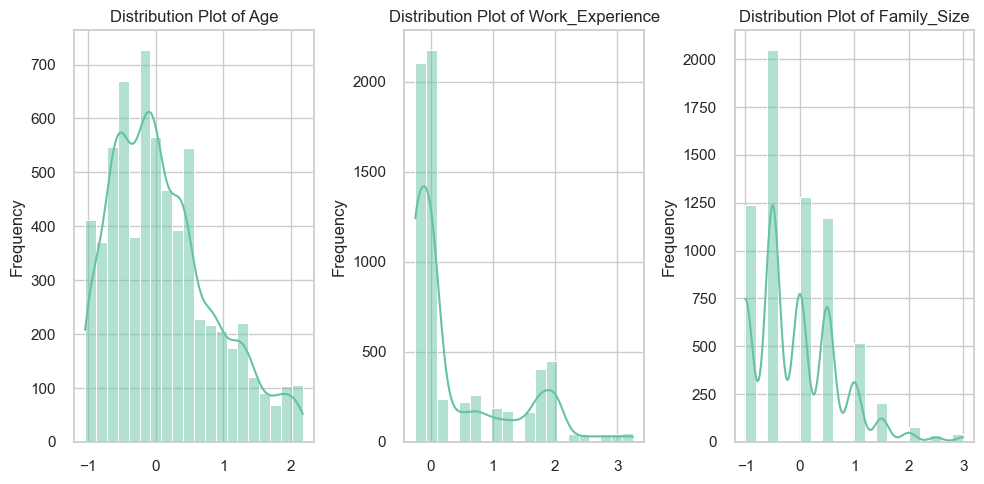

In [83]:
# Histogram plot of the distribution of the different numerical features as a Grid
n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5))

axes = axes.flatten()
for i, col in enumerate(num_features):
    sns.histplot(data_enc[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 2.3 Prepare the data for the training data


We will put all the previous parts together 

In [27]:
def prepare_data_encode_target(data) :
  #Separate the input and the output variables, drop the index ID
  X = data.drop(['ID', 'Segmentation'], axis=1)
  Y = data['Segmentation']

  # Mapping dictionary of our target variable
  segmentation_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

  # Apply the map function to encode the Segmentation column
  Y = Y.map(segmentation_mapping)
  return X, Y

In [31]:
X_train, Y_train = prepare_data_encode_target(train)
X_train.shape, Y_train.shape

((6609, 9), (6609,))

In [169]:
preprocessing_pipeline=Pipeline(steps=[
   ('graduation_correction', GraduationCorrectionTransformer()),
   ('cleaning', cleaning_transformer),
   ('encoding', encoder) ,
])
X_train_proc = preprocessing_pipeline.fit_transform(X_train)
X_train_proc.head()

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Graduated_No,Graduated_Unknown,Graduated_Yes,Spending_Score,Age,Work_Experience,Family_Size
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.130435,1.00,-0.454982
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.304348,2.00,-0.954982
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.521739,0.75,0.545018
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.391304,0.00,1.545018
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.086957,0.25,-0.454982


In [171]:
X_train_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8003 entries, 0 to 8002
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender_Female             8003 non-null   float64
 1   Gender_Male               8003 non-null   float64
 2   Ever_Married_No           8003 non-null   float64
 3   Ever_Married_Unknown      8003 non-null   float64
 4   Ever_Married_Yes          8003 non-null   float64
 5   Profession_Artist         8003 non-null   float64
 6   Profession_Doctor         8003 non-null   float64
 7   Profession_Engineer       8003 non-null   float64
 8   Profession_Entertainment  8003 non-null   float64
 9   Profession_Executive      8003 non-null   float64
 10  Profession_Healthcare     8003 non-null   float64
 11  Profession_Homemaker      8003 non-null   float64
 12  Profession_Lawyer         8003 non-null   float64
 13  Profession_Marketing      8003 non-null   float64
 14  Professi

In [172]:
X_train_proc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender_Female,8003.0,0.452330,0.497754,0.000000,0.000000,0.0,1.000000,1.000000
Gender_Male,8003.0,0.547670,0.497754,0.000000,0.000000,1.0,1.000000,1.000000
Ever_Married_No,8003.0,0.406722,0.491253,0.000000,0.000000,0.0,1.000000,1.000000
Ever_Married_Unknown,8003.0,0.016744,0.128318,0.000000,0.000000,0.0,0.000000,1.000000
Ever_Married_Yes,8003.0,0.576534,0.494139,0.000000,0.000000,1.0,1.000000,1.000000
Profession_Artist,8003.0,0.310883,0.462884,0.000000,0.000000,0.0,1.000000,1.000000
Profession_Doctor,8003.0,0.086842,0.281622,0.000000,0.000000,0.0,0.000000,1.000000
Profession_Engineer,8003.0,0.085218,0.279223,0.000000,0.000000,0.0,0.000000,1.000000
Profession_Entertainment,8003.0,0.115582,0.319743,0.000000,0.000000,0.0,0.000000,1.000000
Profession_Executive,8003.0,0.072473,0.259285,0.000000,0.000000,0.0,0.000000,1.000000


# Task 3. Model Evaluations for Multi-Class Classification Problem

In this section, we aim to validate the effectiveness of our preprocessing steps and identify the most performant model for our multi-class classification problem. We begin with an in-depth examination of the logistic regression algorithm, combined to different preprocessing strategies to understand their impact on model performances. This includes training logistic regression models without data imputation, then incorporating the various imputation techniques that we have introduced, and finally, addressing the class imbalance problem with specific technique. We then extend our analysis by evaluating a diverse set of additional machine learning models. Our goal is to compare the effectiveness of these models and determine the best approach for our classification task. Finally, we conclude with insights gained from our experiments and propose potential directions for the next task.

Our evaluation of different models will be based on measuring and comparing the following metrics:

- Accuracy: the proportion of correctly classified instances among all instances in the dataset.
- F1_weighted: calculates the harmonic mean of precision and recall, with each class's score weighted by its support (the number of true instances). It's useful for imbalanced datasets where class sizes differ significantly.
- Precision_weighted:  measures the proportion of true positive predictions among all positive predictions made by the model. The weighted precision considers each class's precision, weighted by its support, providing an overall precision score.
- Recall_weighted: Recall, also known as sensitivity or true positive rate, measures the proportion of true positives predicted correctly out of all actual positive instances. The weighted recall considers each class's recall, weighted by its support, providing an overall recall score.
- F1_macro: calculates the average F1 score across all classes without considering class imbalance. It treats all classes equally, providing insight into the model's ability to generalize across different classes.
- Precision_macro and Recall_macro : The macro-averaged precision and recall. They provides an overall precision and recall scores, treating all classes equally.
- Confusion matrix : allows visualization of the performance on each of the classes by comparing predicted class labels with actual class labels.

## 3.1 Training Logistic Regression with different preprocessing strategies


We will be training and comparaing 4 differents combinaison of data imputation and class imbalance solutions when training a Logistic Regession classification model.
1. **LR basic** : all rows with missing data will be dropped, no correction to the 'Graduated' variable will be applied, no specific treatement of class imbalance will be intergrated. Categoriacal and ordinal features will be encoded and the numerical ones will be scaled
2. **LR Imputation** : we will apply the correction and the impuation pipeline in addidition to the encoding and the scaling pipelines. No special solution to class imbalance will be integrated.
3. **LR One Vs Rest** : This basically the LR Imputation model wrapped within **OvR classifier** for a better handling of class imbalance (further explanation will be given later on). We will also set the **class_weight** parameter to balanced. This option adjusts the weights inversely proportional to class frequencies in the input data, giving more importance to minority classes during training.
4. **LR Re-Sample** : We added a further step to our pipeline of preprocessing and training LR model. This pipeline step includes **SMOTEENN**, a combination of SMOTE (Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbors), to handle class imbalance by oversampling the minority class and cleaning noisy samples from the majority class. 


#### 3.1.1 Train Logistic Regression Model without data imputation pipeline


We will preprocess the dataset by removing all rows with missing values and without dropping the 'Graduated' column. Next, we will encode categorical and ordinal features and scale numerical features. After preprocessing, we will train the model using stratified K-fold cross-validation. The mean values of the computed metrics (accuracy, F1 score, precision, and recall) will be displayed. Finally, we will retrain the model on the entire training dataset and evaluate its performances on the testing dataset.

In [173]:
#A list to store all results across the experimentations
all_results_lr=[]

In [174]:
def train_with_no_imputation_pipeline(model, dataset):
  #Dropping all rows with missing data
  df=dataset.dropna()

  #Prepare the data for the training
  X_train_no, Y_train_no = prepare_data_encode_target(df)

  #Create the encoding and training pipeline
  no_missing_pipeline=Pipeline(steps=[
      ('encoding', encoder) ,
      ('estimator', LogisticRegression(random_state=42))
  ])

  #Stratified Kfold since we have a multi-class classification problem
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  #The evaluation metrics
  scoring = {'Accuracy': 'accuracy', 'F1_weighted':'f1_weighted', 'Precision_weighted': 'precision_weighted', 'Recall_weighted':'recall_weighted',
            'F1_macro':'f1_macro', 'Precision_macro': 'precision_macro', 'Recall_macro':'recall_macro'}

  #Fit the data using K-fold cross validation
  scores = cross_validate(no_missing_pipeline, X_train_no, Y_train_no, scoring=scoring, cv=skf)
  mean_scores_test = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring.keys()}
  return mean_scores_test, no_missing_pipeline, X_train_no, Y_train_no

In [175]:
mean_scores_test, no_missing_pipeline, X_train_no, Y_train_no = train_with_no_imputation_pipeline(LogisticRegression(random_state=42), train)
#Storing the results for later comparaison
mean_scores_test['Model']='LR_NoImputation'
mean_scores_test['Dataset']='Train'
all_results_lr.append(mean_scores_test)

In [176]:
# Retrain the pipeline on the entire training dataset
no_missing_pipeline.fit(X_train_no, Y_train_no)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Ever_Married',
                                                   'Profession', 'Var_1',
                                                   'Graduated']),
                                                 ('ord_enc_Spending_Score',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Average',
                                                                              'High']]),
                                                  ['Spending_Score']),
                                                 ('scaling', RobustScaler(),
                                                  ['Age', 'Work_Experience',
                                                   'Family_Size'])],
                                   verbose_feature_names_out=False)),
                ('estimator', LogisticRegression(random_state=42))])

**Evaluate the model on the testing dataset**

In [177]:
#Utility function to compute evaluation on testing data
def evaluate_test_data(model, X_test, Y_test, verbose=False) :
  #Get the predictions for the testing data
  y_pred_test = model.predict(X_test)

  # Generate classification report
  report = classification_report(Y_test, y_pred_test,  output_dict=True)
  cm=confusion_matrix(Y_test, y_pred_test)

  scoring = {'Accuracy': report['accuracy'],  'F1_weighted':report['weighted avg']['f1-score'],
              'Precision_weighted': report['weighted avg']['precision'],
             'Recall_weighted':report['weighted avg']['recall'],
             'F1_macro':report['macro avg']['f1-score'], 'Precision_macro': report['macro avg']['precision'],
             'Recall_macro':report['macro avg']['recall']
          }

  return scoring, cm

In [178]:
def eval_test_data_no_imputation(model, test_dataset, verbose=False) :
  #Dropping all rows with missing data
  df_test=test_dataset.dropna()

  #Prepare the data for the fitting
  X_test_no, Y_test_no = prepare_data_encode_target(df_test)

  #Compute the prediction and evaluate the results
  scoring, cm = evaluate_test_data(model, X_test_no, Y_test_no, verbose)

  return scoring, cm

In [179]:
def plotting_confusion_matrix(confusion_matrix, class_names) :
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

In [180]:
#Evaluate the model on testing data and store the results for later evaluation
scoring, cm = eval_test_data_no_imputation(no_missing_pipeline, test)
scoring['Model']= 'LR_NoImputation'
scoring['Dataset']='Test'
all_results_lr.append(scoring)

In [181]:
#Displaying all the results for this first experimentation
print("## Strategy 1. Evaluations LR with no data imputation and with no correction of Graduated.  All rows with missing data are dropped \n")
df_results=pd.DataFrame(all_results_lr)
df_results

## Strategy 1. Evaluations LR with no data imputation and with no correction of Graduated.  All rows with missing data are dropped 



,Accuracy,F1_weighted,Precision_weighted,Recall_weighted,F1_macro,Precision_macro,Recall_macro,Model,Dataset
0,0.502041,0.449087,0.467964,0.502041,0.395607,0.456037,0.418375,LR_NoImputation,Train
1,0.495442,0.437297,0.591665,0.495442,0.385070,0.624068,0.410605,LR_NoImputation,Test


# Confusion matrix of strategy 1



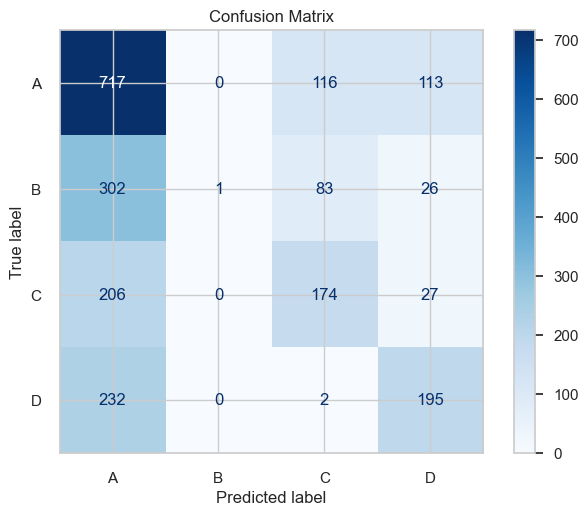

In [182]:
print("# Confusion matrix of strategy 1\n")
class_names = ['A', 'B', 'C', 'D']
plotting_confusion_matrix(cm,class_names)

From the above confusion matrix:

- **Class B** appears to have the least inaccurate classifications, but also no correct prediction at all. We recall that this class have the lowest number of examples (312). The model didn't seem to distinguish examples belonging to this class in a positive or negative way.
- **Class C** has a relatively high number of correct predictions (174) but also has a notable number of misclassifications, especially when compared to its instance count (407).
- **Class D** shows a similar trend, with a moderate number of correct predictions (195) but also a significant number of misclassifications.
- **Class A** has the highest number of correct predictions (717), but it also has a considerable number of misclassifications, particularly with classes C and D.

Overall, the model's performance is affected by class imbalance, as evidenced by the unequal distribution of correct predictions across classes. Classes with fewer instances tend to have fewer misclassifications but may also suffer from lower overall accuracy due to their smaller representation in the dataset. This highlights the challenge of handling imbalanced datasets and the need for specific techniques to handle this kind of datasets such as oversampling, undersampling, or class weighting.

#### 3.1.2 Train Logistic Regression Model using data imputation strategies

In [183]:
def train_with_imputation_pipeline(estimator, X_train, Y_train) :
  full_pipeline=Pipeline(steps=[
      ('graduation_correction', GraduationCorrectionTransformer()),
      ('cleaning', cleaning_transformer),
      ('encoding', encoder) ,
      ('estimator', estimator)
  ])

  #stratified Kfold since we have a multi-class classification problem
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  scoring = {'Accuracy': 'accuracy', 'F1_weighted':'f1_weighted', 'Precision_weighted': 'precision_weighted', 'Recall_weighted':'recall_weighted',
            'F1_macro':'f1_macro', 'Precision_macro': 'precision_macro', 'Recall_macro':'recall_macro'}

  #Fit the data using K-fold cross validation
  scores = cross_validate(full_pipeline, X_train, Y_train, scoring=scoring, cv=skf)

  scores = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring.keys()}
  return scores, full_pipeline

In [184]:
print("Training with imputation pipeline")
X_train, Y_train = prepare_data_encode_target(train)
scores, full_pipeline = train_with_imputation_pipeline(LogisticRegression(random_state=42), X_train, Y_train)
scores['Model']='LR_WithImputation'
scores['Dataset']='Train'
all_results_lr.append(scores)

Training with imputation pipeline


In [185]:
# Retrain the pipeline on the entire training dataset
full_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('graduation_correction',
                 GraduationCorrectionTransformer(professions=['Doctor',
                                                              'Lawyer',
                                                              'Engineer',
                                                              'Executive',
                                                              'Healthcare'])),
                ('cleaning',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('unknown_impute',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant'),
                                                  ['Ever_Married', 'Profession',
                                                   'Graduated']),
                                                 ('frequency',
                                                  SimpleImp...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Ever_Married',
                                                   'Profession', 'Var_1',
                                                   'Graduated']),
                                                 ('ord_enc_Spending_Score',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Average',
                                                                              'High']]),
                                                  ['Spending_Score']),
                                                 ('scaling', RobustScaler(),
                                                  ['Age', 'Work_Experience',
                                                   'Family_Size'])],
                                   verbose_feature_names_out=False)),
                ('estimator', LogisticRegression(random_state=42))])

**Evaluate on the testing data**

In [186]:
#Prepare the data for the training
X_test, Y_test = prepare_data_encode_target(test)
scoring, cm =evaluate_test_data(full_pipeline, X_test, Y_test)
scoring['Model']= 'LR_WithImputation'
scoring['Dataset']='Test'
all_results_lr.append(scoring)

In [187]:
print("## Strategy 2. Evaluating LR with full data preprocessing pipeline\n")
df_results=pd.DataFrame(all_results_lr)
df_results

## Strategy 2. Evaluating LR with full data preprocessing pipeline



,Accuracy,F1_weighted,Precision_weighted,Recall_weighted,F1_macro,Precision_macro,Recall_macro,Model,Dataset
0,0.502041,0.449087,0.467964,0.502041,0.395607,0.456037,0.418375,LR_NoImputation,Train
1,0.495442,0.437297,0.591665,0.495442,0.385070,0.624068,0.410605,LR_NoImputation,Test
2,0.500062,0.445708,0.450502,0.500062,0.385443,0.428441,0.406385,LR_WithImputation,Train
3,0.497376,0.439113,0.411537,0.497376,0.384765,0.382058,0.407710,LR_WithImputation,Test


# Confusion matrix of strategy 2



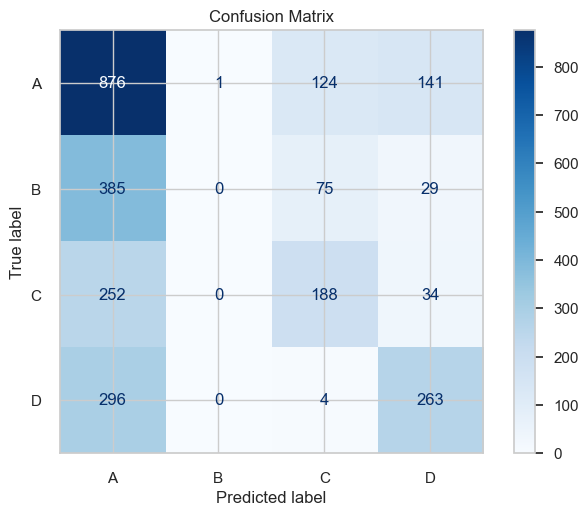

In [188]:
print("# Confusion matrix of strategy 2\n")
plotting_confusion_matrix(cm,class_names)

When training a model with preprocessed data, we didn't observe any improvement considerable improvement in the values of the evaluation metrics, neither a significant change in the confusion matrix.

#### 3.1.3 Analysis of the models performances

In [189]:
df_results.sort_values(['Dataset', 'Accuracy'], ascending=False, inplace=True)
df_results

,Accuracy,F1_weighted,Precision_weighted,Recall_weighted,F1_macro,Precision_macro,Recall_macro,Model,Dataset
0,0.502041,0.449087,0.467964,0.502041,0.395607,0.456037,0.418375,LR_NoImputation,Train
2,0.500062,0.445708,0.450502,0.500062,0.385443,0.428441,0.406385,LR_WithImputation,Train
3,0.497376,0.439113,0.411537,0.497376,0.384765,0.382058,0.407710,LR_WithImputation,Test
1,0.495442,0.437297,0.591665,0.495442,0.385070,0.624068,0.410605,LR_NoImputation,Test


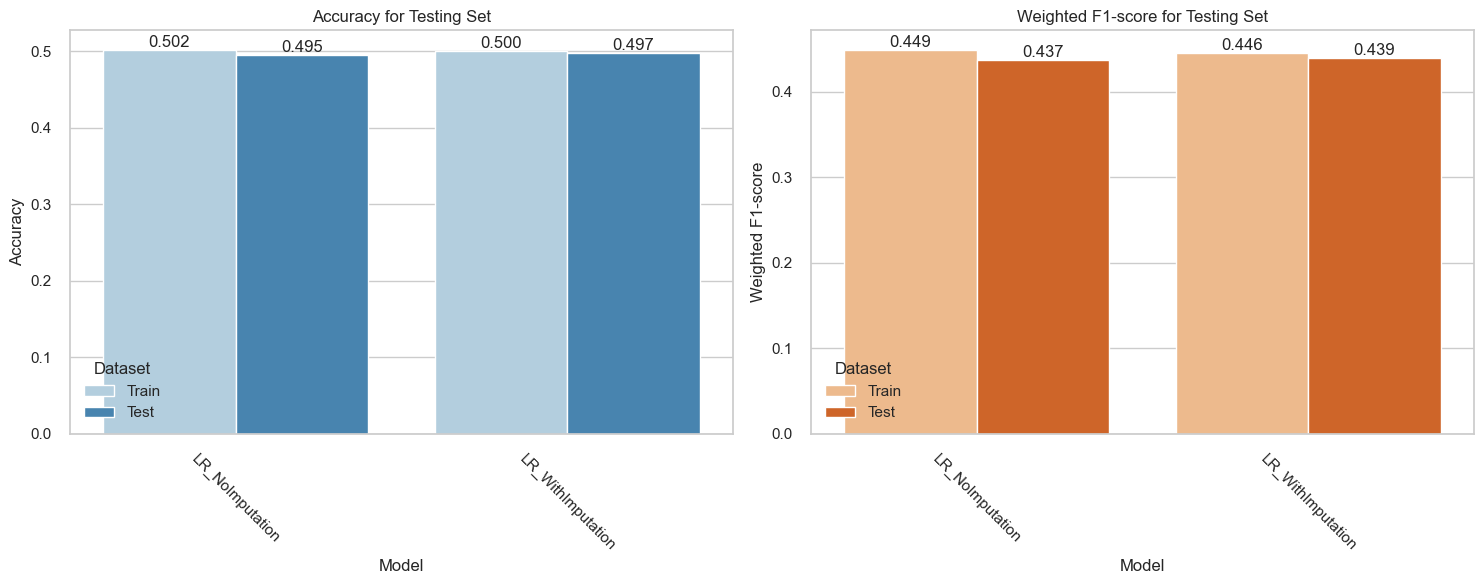

In [190]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create the bar plot for Accuracy
df_results.sort_values('Accuracy', inplace=True, ascending=False)
sns.barplot(data=df_results, x='Model', y='Accuracy', ax=axes[0], palette='Blues', hue='Dataset')
axes[0].set_title('Accuracy for Testing Set')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f')

axes[0].tick_params(axis='x', rotation=-45)

# Create the bar plot for F1-score
df_results.sort_values('F1_weighted', inplace=True, ascending=False)
sns.barplot(data=df_results, x='Model', y='F1_weighted', ax=axes[1], palette='Oranges', hue='Dataset')
axes[1].set_title('Weighted F1-score for Testing Set')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Weighted F1-score')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.3f')

axes[1].tick_params(axis='x', rotation=-45)
plt.tight_layout()
plt.show()

From the above evaluations results, we can draw some important conclusions :
- The logistic Regression  model shows comparable performance on training and test data, indicating that it is not overfitting or underfitting significantly.
- Model show on both training and testing sets an accuracy around 0.5, indicating a low performance, which suggests the model has room for improvement.
- F1 scores, both weighted and macro, are below 0.5, indicating the model's predictions are not balanced across different classes.
- Precision and recall metrics also suggest the model does not perform well in distinguishing between different classes, as they hover around 0.4.
- The imputation slightly affects the model's precision and recall but does not lead to significant performance improvements overall.

The Logistic Regression model currently shows suboptimal performance, indicating a need for further refinement and experimentation with other techniques to achieve better results.

**Improvements and Future Tests**
We have different possible improvements and tests to conduct in order to figure out better training strategies and selecting a better suited model for our dataset.
- First, we should investigate specific techniques to handle imbalanced classes, such as oversampling, undersampling, or using class weights. The above results have assert that the LR model is not capable to predict customers belonging to minority classes.
- Then, we will evaluate other classification algorithms (e.g., Random Forest, SVM, Gradient Boosting) to identify potential performance improvements.
- if we don't get better performances, we should perform more feature engineering by creating more informative features and add them to our dataset.




### 3.1.4. Logistic Regression with class imbalance strategies

* **One-vs-Rest strategy with class weight**

LogisticRegression class can be used with two specific strategies to handle dataset with multiple classes and having class imbalance problem: the one-vs-rest (OvR) or one-vs-one (OvO) strategy for multi-class classification.
- In the One-vs-Rest strategy, a single classifier per class is trained, with the class being fitted against all other classes.
- In the One-vs-One strategy, a classifier is trained for every pair of classes.

We choose to use OvR strategy with LR since it is well-suited to handle class imbalance. In fact using this strategy, each binary classifier independently learns to recognize one class against all others, which helps in better distinguishing minority classes. We can also adjust class weights which ensures that the learning algorithm pays more attention to minority classes, and thus improving overall classification performance.

In the following code, we will wrap LR within OvR classifier and set the **class_weight** parameter to balanced. This option adjusts the weights inversely proportional to class frequencies in the input data, giving more importance to minority classes during training.

In [191]:
# Wrapping Logistic Regression with One-vs-Rest strategy and setting class weight
lr_ovr = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced'))

#Evaluate on the training data with imputation pipeline
scores_train, lr_ovr_pipeline=train_with_imputation_pipeline(lr_ovr, X_train, Y_train)
scores_train['Model']= 'LR_OneVsRest'
scores_train['Dataset'] ='Train'
all_results_lr.append(scores_train)

#Fit the model on full train data
lr_ovr_pipeline.fit(X_train, Y_train)

#Evaluate on the testing data
scores_test, cm=evaluate_test_data(lr_ovr_pipeline, X_test, Y_test)
scores_test['Model']= 'LR_OneVsRest'
scores_test['Dataset'] ='Test'
all_results_lr.append(scores_test)

Remarquable change in the diagonal of the confusion matrix. We start to see examples correctly classified in the different classes, in particular the minority classes like B. Still, we can notice an important amount of missclassification across the different classes and at various levels.

# Confusion matrix of strategy 3



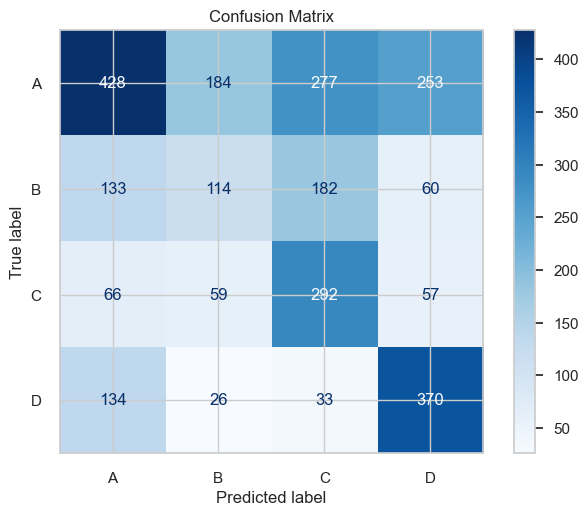

In [192]:
print("# Confusion matrix of strategy 3\n")
plotting_confusion_matrix(cm,class_names)

* Combined Undersampling and Oversampling strategy and class weight

We added a further step in our pipeline to handle class imbalance. This pipeline step includes SMOTEENN, a combination of SMOTE (Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbors), to handle class imbalance by oversampling the minority class and cleaning noisy samples from the majority class.

In [193]:
# Define the resampling technique
# SMOTEENN: Combines SMOTE and undersampling to balance the classes more effectively.
smote_enn = SMOTEENN(random_state=42)



# Define the pipeline
pipeline_us = ImbPipeline(steps=[
    ('graduation_correction', GraduationCorrectionTransformer()),
    ('cleaning', cleaning_transformer),
    ('encoding', encoder) ,
    ('resample', smote_enn),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced'))
])

#stratified Kfold since we have a multi-class classification problem
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {'Accuracy': 'accuracy', 'F1_weighted':'f1_weighted', 'Precision_weighted': 'precision_weighted', 'Recall_weighted':'recall_weighted',
            'F1_macro':'f1_macro', 'Precision_macro': 'precision_macro', 'Recall_macro':'recall_macro'}

#Fit the data using K-fold cross validation
scores_us = cross_validate(pipeline_us, X_train, Y_train, scoring=scoring, cv=skf)

scores_us = {metric: np.mean(scores_us[f'test_{metric}']) for metric in scoring.keys()}
print("Scores on Training data:\n")
for k,v in scores_us.items():
  print(f'{k} : {v:.2f}')

scores_us['Model']='LR_ReSample'
scores_us['Dataset']='Train'
all_results_lr.append(scores_us)

# Fit the pipeline on the entire training set
pipeline_us.fit(X_train, Y_train)

# Evaluate on the test set
#Evaluate on the testing data
scores_us, cm=evaluate_test_data(pipeline_us, X_test, Y_test)
scores_us['Model']= 'LR_ReSample'
scores_us['Dataset'] ='Test'
all_results_lr.append(scores_us)

Scores on Training data:

Accuracy : 0.44
F1_weighted : 0.44
Precision_weighted : 0.46
Recall_weighted : 0.44
F1_macro : 0.43
Precision_macro : 0.43
Recall_macro : 0.46


# Confusion matrix of strategy 3



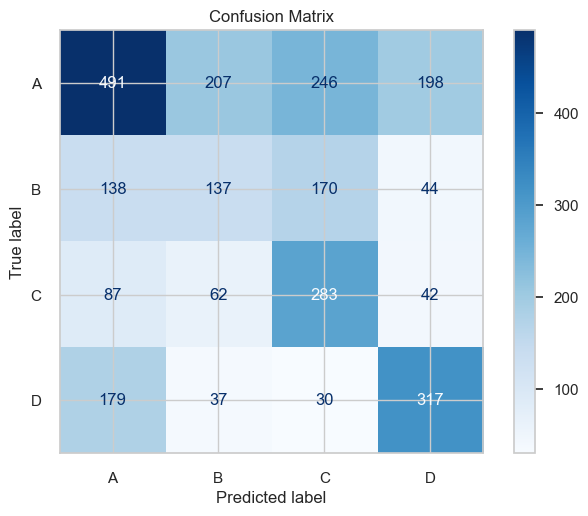

In [194]:
print("# Confusion matrix of strategy 3\n")
plotting_confusion_matrix(cm,class_names)

Using combined resampling and class weight, we have also improved the accuracy at the minority class levels. However, the miss-labelling of examples from classes B, C, D as being from class A is still really high. This suggests that despite the fact of using techniques specially tailored to handle the imbalance data problem, we didn't succeed to drastically improve the performances of our Logistic Regression model. The overall model performances are still very poor.

In [195]:
df_results_imb=pd.DataFrame(all_results_lr)
df_results_imb.sort_values(['Dataset', 'Accuracy'], ascending=False, inplace=True)
df_results_imb

,Accuracy,F1_weighted,Precision_weighted,Recall_weighted,F1_macro,Precision_macro,Recall_macro,Model,Dataset
0,0.502041,0.449087,0.467964,0.502041,0.395607,0.456037,0.418375,LR_NoImputation,Train
2,0.500062,0.445708,0.450502,0.500062,0.385443,0.428441,0.406385,LR_WithImputation,Train
4,0.446459,0.437357,0.464171,0.446459,0.430453,0.428002,0.464488,LR_OneVsRest,Train
6,0.444084,0.442480,0.464086,0.444084,0.433393,0.428948,0.457004,LR_ReSample,Train
3,0.497376,0.439113,0.411537,0.497376,0.384765,0.382058,0.407710,LR_WithImputation,Test
1,0.495442,0.437297,0.591665,0.495442,0.385070,0.624068,0.410605,LR_NoImputation,Test
7,0.460270,0.458757,0.471775,0.460270,0.447809,0.443379,0.467553,LR_ReSample,Test
5,0.451274,0.442778,0.466969,0.451274,0.435858,0.433129,0.470284,LR_OneVsRest,Test


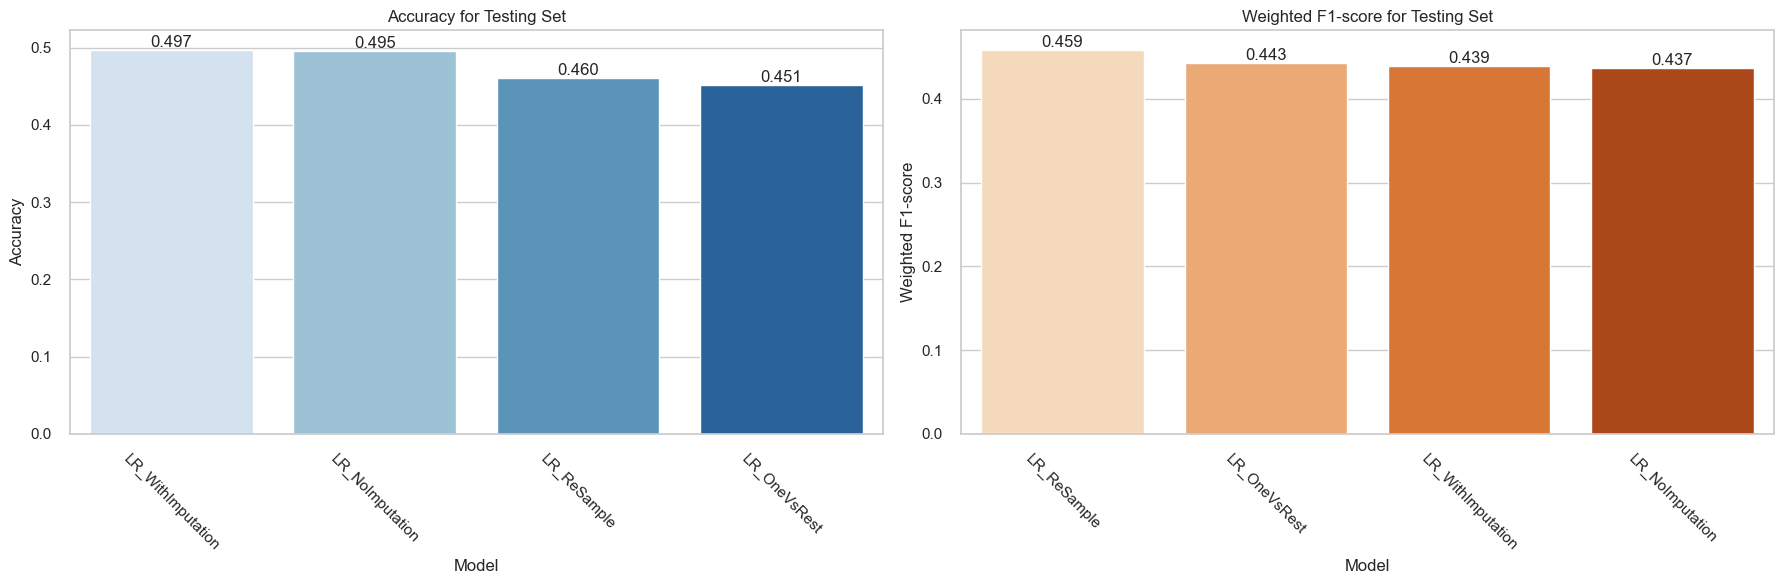

In [196]:
df_results_imb_test= df_results_imb[df_results_imb['Dataset']=='Test']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Create the bar plot for Accuracy
df_results_imb_test.sort_values('Accuracy', inplace=True, ascending=False)
sns.barplot(data=df_results_imb_test, x='Model', y='Accuracy', ax=axes[0], palette='Blues')
axes[0].set_title('Accuracy for Testing Set')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f')

axes[0].tick_params(axis='x', rotation=-45)

# Create the bar plot for F1-score
df_results_imb_test.sort_values('F1_weighted', inplace=True, ascending=False)
sns.barplot(data=df_results_imb_test, x='Model', y='F1_weighted', ax=axes[1], palette='Oranges')
axes[1].set_title('Weighted F1-score for Testing Set')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Weighted F1-score')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.3f')

axes[1].tick_params(axis='x', rotation=-45)

plt.tight_layout()
plt.show()

The plots above summarize the evaluation results on the testing set using the logistic regression model. The highest accuracy was achieved by a model where we simply dropped rows with any missing values, without applying special imputation techniques. Conversely, the model that performed best in terms of the weighted F1 score was the logistic regression model using a combined resampling strategy and class weighting along with an imputation pipeline. This approach effectively handled data imbalance and improved classification of minority classes compared to other models.

Despite these efforts, the overall classification performance remains unsatisfactory. The highest achieved accuracy didn't exceed 50%. We have explored various methods to address missing data and class imbalance, but have not yet achieved the desired improvement in performance. Therefore, in the next section, we will evaluate different machine learning models and compare their effectiveness in solving our multi-class classification problem. We hope to identify a better-performing model through this comparative analysis.

## 3.2 Exploring More Machine Learning Models

In this section, we aim to compare the performance of various machine learning models on our multi-class classification problem. We choose to compare a set of machine learning models known for theirr performances on similar problems including:
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Random Forest
- LightGBM
- XGBoost

We will follow the same steps as in our previous experimentations. Each model from the above list will be trained using cross-validation with an imputation pipeline. Thenn, the trained model will be fit on the entire training dataset and then evaluated on the testing data. The results of different metrics on training and testing data will be collected and recorded for comparaison.

The goal of this process is to systematically evaluate and compare the performance of different models on our multi-class classification task, identifying which model performs best under the given conditions. All the models will be trained with their default parameters.

In [197]:
# Models to evaluate
all_results=[]
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42) ,
    'LightGBM' : lgb.LGBMClassifier(random_state=42),
    'XGBoost' : XGBClassifier(random_state=42)
}

# Train and evaluate each model on the training data using cross validation and imputation pipeline
for name, model in models.items():
    print("Model : ", name)
    #Evaluate on the training data
    scores_train, model_pipeline=train_with_imputation_pipeline(model, X_train, Y_train)
    scores_train['Model']= name
    scores_train['Dataset'] ='Train'
    all_results.append(scores_train)

    #Fit the model on full train data
    model_pipeline.fit(X_train, Y_train)

    #Evaluate on the testing data
    scores_test, cm = evaluate_test_data(model_pipeline, X_test, Y_test, False)
    scores_test['Model']= name
    scores_test['Dataset'] ='Test'
    all_results.append(scores_test)

Model :  SVM
Model :  KNN
Model :  Random Forest
Model :  LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 6402, number of used features: 29
[LightGBM] [Info] Start training from score -0.846101
[LightGBM] [Info] Start training from score -1.765856
[LightGBM] [Info] Start training from score -1.677628
[LightGBM] [Info] Start training from score -1.546189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 6402, number of used features: 29
[LightGBM] [Inf

In [198]:
#Add our previous results for an overall comparaison
all_results=all_results+all_results_lr
df_results= pd.DataFrame(all_results)
df_results.sort_values(['Dataset', 'Accuracy'], ascending=False)

,Accuracy,F1_weighted,Precision_weighted,Recall_weighted,F1_macro,Precision_macro,Recall_macro,Model,Dataset
0,0.505812,0.452970,0.463463,0.505812,0.394964,0.445484,0.416682,SVM,Train
10,0.502041,0.449087,0.467964,0.502041,0.395607,0.456037,0.418375,LR_NoImputation,Train
12,0.500062,0.445708,0.450502,0.500062,0.385443,0.428441,0.406385,LR_WithImputation,Train
6,0.481068,0.458009,0.460953,0.481068,0.418584,0.446129,0.421571,LightGBM,Train
8,0.467823,0.449405,0.447167,0.467823,0.411969,0.428151,0.414365,XGBoost,Train
14,0.446459,0.437357,0.464171,0.446459,0.430453,0.428002,0.464488,LR_OneVsRest,Train
16,0.444084,0.442480,0.464086,0.444084,0.433393,0.428948,0.457004,LR_ReSample,Train
2,0.439958,0.425141,0.427940,0.439958,0.385584,0.409647,0.377768,KNN,Train
4,0.420091,0.411681,0.409218,0.420091,0.380267,0.389477,0.376866,Random Forest,Train
1,0.498501,0.441434,0.413109,0.498501,0.388866,0.384836,0.411735,SVM,Test


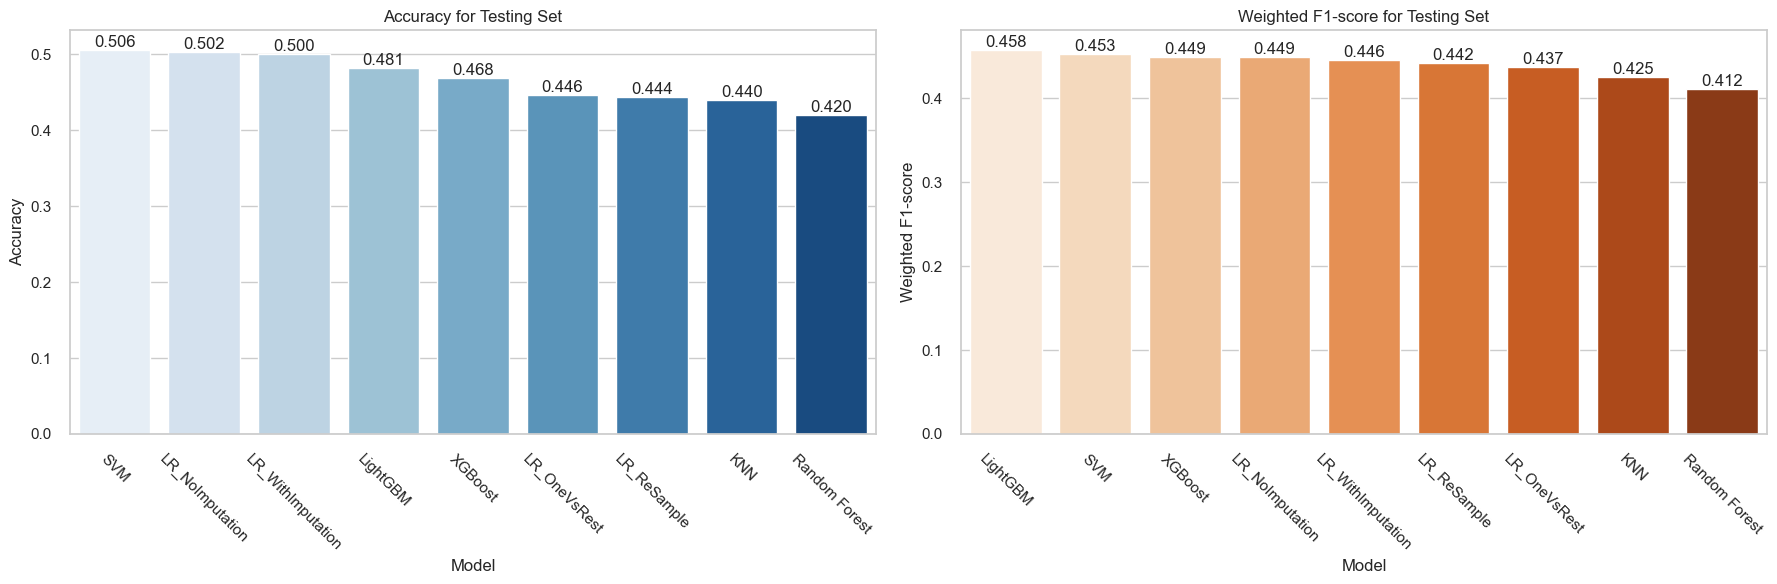

In [199]:
eval_train= df_results[df_results['Dataset']=='Train']
eval_train.sort_values('Accuracy', ascending=False, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Create the bar plot for Accuracy
sns.barplot(data=eval_train, x='Model', y='Accuracy', ax=axes[0], palette='Blues')
axes[0].set_title('Accuracy for Testing Set')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f')

axes[0].tick_params(axis='x', rotation=-45)

eval_train.sort_values('F1_weighted', ascending=False, inplace=True)
# Create the bar plot for F1-score
sns.barplot(data=eval_train, x='Model', y='F1_weighted', ax=axes[1], palette='Oranges')
axes[1].set_title('Weighted F1-score for Testing Set')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Weighted F1-score')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.3f')

axes[1].tick_params(axis='x', rotation=-45)

plt.tight_layout()
plt.show()

## 3.3 Experimentation conclusions and future directions

Based on the results of our comparative analysis of different machine learning models, we can draw the following key conclusions:

- Support Vector Machine (SVM) achieved the highest accuracy (50.06%) among all models. However, its weighted F1 score (41.75%) suggests that while it excels in overall accuracy, it may struggle with class imbalance and minority class classification.

- Logistic Regression without Imputation (LR_NoImputation) and with Imputation (LR_WithImputation) showed similar performance, indicating that dropping rows with missing values or imputing them has a comparable impact on model performance.

- LightGBM and XGBoost performed comparably in terms of accuracy. Both models demonstrated strong weighted F1 scores, indicating good handling of class imbalance and better performance on minority classes compared to the logistic regression models.

- Logistic Regression with Combined Resampling and Class Weighting (LR_Resample) and Logistic Regression One-vs-Rest (LR_OneVsRest) showed the highest weighted F1 score (45.8%) comparing to other version of Logistic regression, indicating that these approachs effectively addresses data imbalance and improves minority class classification.

- K-Nearest Neighbors (KNN) and Random Forest demonstrated lower performance across all metrics. These models may require further tuning or modifications to improve their effectiveness in this classification problem.

Despite advanced imputation techniques, data encoding, scaling, and stratified K-fold cross-validation, the highest accuracy achieved by our models does not exceed 50%, and the best weighted F1-score is around 46%. This indicates that our current features and models are not adequately capturing the complexity of the multi-class classification problem, potentially due to the nuanced and subjective criteria used by human agents for segmentation. To improve performance, we may need to:

- Enhance Feature Engineering: Identify and include features that better capture the criteria used by human agents.
- Consult Domain Experts: Gain insights from the human agents to understand their decision-making process and incorporate that knowledge into the model.

- Conduct more analysis of data to check whether the customers segments are well defined and reflects the customers features.

Next, we will examine the data segmentation, visualize it using PCA, and assess whether the current feature and example distributions align with the segmentation provided by the dataset. This analysis will help us understand the data structure and guide further model improvements.

# Task 4. Clustering and Re-segmentation Analysis

In this section, we critically examine the initial customer segments and explore alternative clustering methods to enhance the segmentation. Initially, we visualized the customer segments using PCA and discovered that the original segments were not informative and did not accurately reflect the data structure. To address this, we applied K-means clustering to create new segments. We visualized these new clusters using PCA and t-SNE, and determined the optimal number of clusters using the Elbow method. Subsequently, we replaced the old segmentation with the newly identified clusters and trained a new multi-class classification model. Finally, we interpreted the results, describing the characteristics of the new clusters and their implications for our classification problem.

### 4.1 Visualizing the customer Segments using PCA





PCA is set to 2 dimensions primarily for visualization purposes because it allows us to create scatter plots that can be easily interpreted

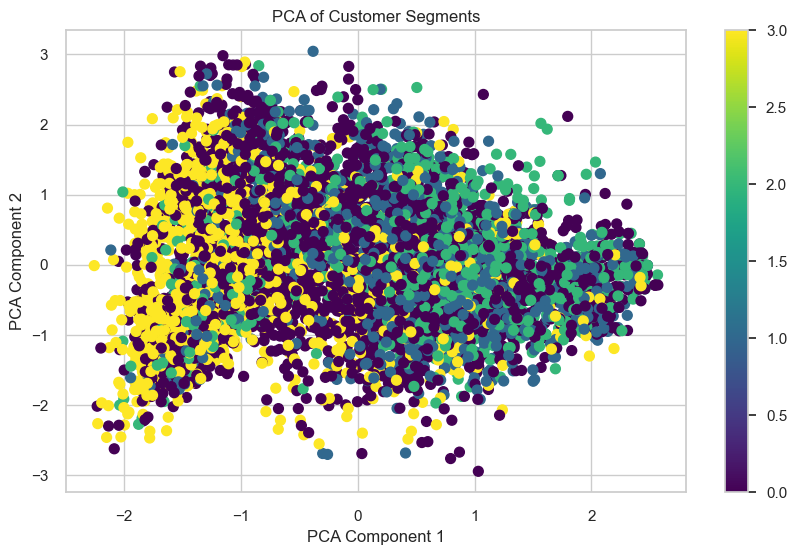

In [200]:
# Combine preprocessing steps
# Define the pipeline
preprocessing = Pipeline(steps=[
    ('graduation_correction', GraduationCorrectionTransformer()),
    ('cleaning', cleaning_transformer),
    ('encoding', encoder)
])

# Apply preprocessing to the training
X_processed = preprocessing.fit_transform(X_train)

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_train, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Customer Segments')
plt.colorbar()
plt.show()

In [ ]:
# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_processed)

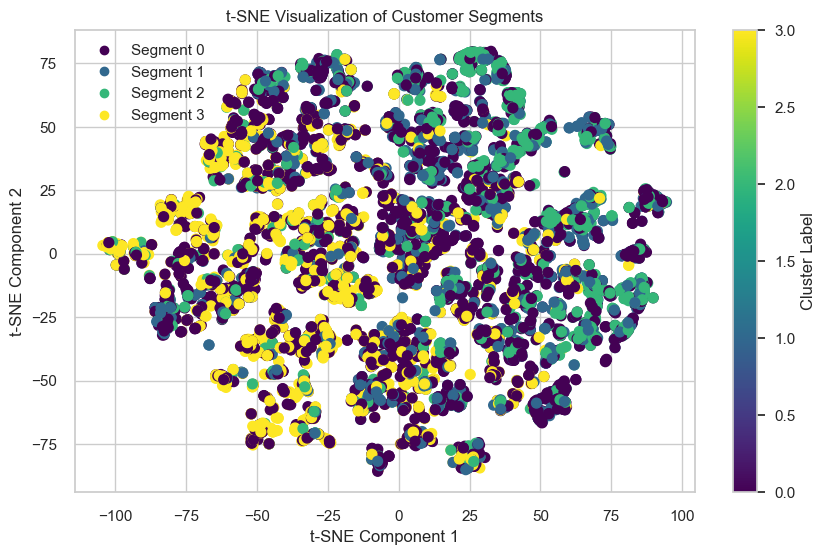

In [217]:
# Plot the t-SNE with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_train, cmap='viridis', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Customer Segments')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Segment {i}' for i in range(4)])
plt.colorbar(scatter, label='Cluster Label')
plt.show()

The PCA and the S-NE plots show the distribution of customers across two principal components based on their features, with colors representing different initial customer segments (0, 1, 2, 3 corresponding to segments A, B, C, D).

 * **Mixed Data Points**: The plots displaying the actual customer segments using PCA shows that the data points are mixed and not easily separable. This suggests that the features used for segmentation do not naturally form well-defined clusters in the reduced 2-dimensional space.

 * **Misalignment with Significant Variance**: This can indicate that the original segmentation might not align well with the most significant variance directions in the data. The lack of clear clusters suggests that the segments are not well-defined, and customers from different segments exhibit similar characteristics. This implies that the segmentation does not capture distinct customer behaviors or preferences.

 * **Impact on Model Performance**: This observation also explains the poor results of the different classification models we have experimented with. Despite using various preprocessing techniques, sampling strategies, and methods to handle minority classes, the best accuracy achieved is around 50%. This highlights that no matter how sophisticated the machine learning algorithm, if the data is not well-represented or inherently lacks clear separability, the model's performance will be limited.

Given the poor performance of the classification models (with accuracy and weighted F1-scores not exceeding 50%) and the visual evidence from the PCA plot showing overlapping segments, it is evident that the initial segmentation is not effective. The overlap indicates that the features used to define the segments do not provide sufficient discriminatory power.

### Next Steps:

1. **Re-Segmentation Using Clustering**:
   - To address the issue of poorly defined segments, I decided to apply a K-Means clustering algorithm. This method will group customers based on their features, aiming to create more distinct and meaningful segments.

2. **Evaluation of New Segmentation**:
   - The new segmentation will be evaluated to ensure it forms clear, distinct groups of customers. This can be done using internal validation metrics (e.g., silhouette score) and visual inspection of clustering results using dimensionality reduction techniques like PCA and t-SNE.

3. **Retraining Classification Models**:
   - With the new segments defined by the clustering algorithm, I will retrain the multi-class classification models. The expectation is that the new segments will be more meaningful, leading to significantly improved model performance.


By re-segmenting the customers based on clustering, I aim to achieve better-defined segments that will enhance the performance of classification models, ultimately providing more actionable insights for customer segmentation. 

## 4.2 New clustering of customers using K-means

In [203]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_processed)

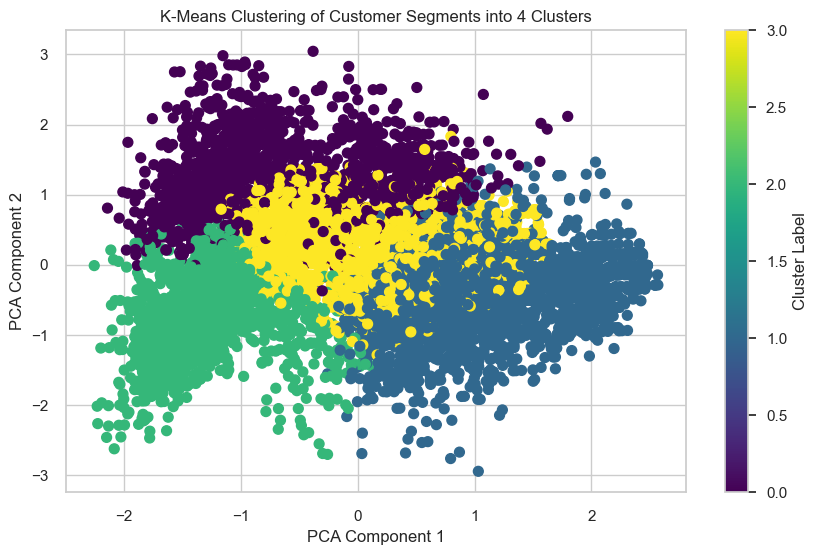

In [204]:
# Plot the PCA with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Customer Segments into 4 Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

The plot displaying the clusters identified by K-means shows clear and easily separable clusters. K-means is designed to partition the data into *k* clusters by minimizing the variance within each cluster. Therefore, even if the natural clusters are not well-separated in the PCA plot, K-means can still find a partitioning that groups similar data points together.

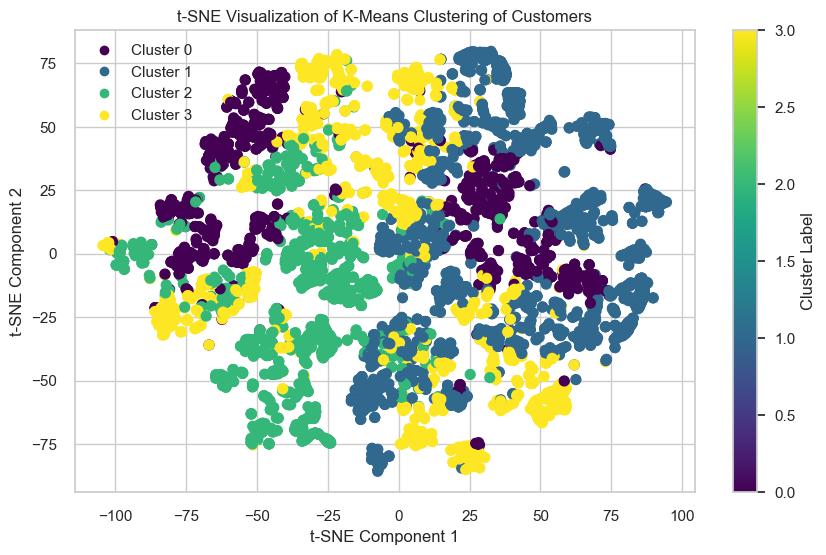

In [205]:
# Plot the t-SNE with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of K-Means Clustering of Customers')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(4)])
plt.colorbar(scatter, label='Cluster Label')
plt.show()

**Evaluating the quality of the clusters using different scores**

To evaluate the validity of our clusters, we will use metrics like the Silhouette Score and the Davies-Bouldin Index. These metrics provide a quantitative measure of the quality of our clustering.
* Silhouette Score: it ranges from -1 to 1, where a higher value indicates betters clusters. The score reflets how similar a point is to its own cluster (cohesion) compared to other clusters (separation)
* Davies-Bouldin Index: A lower value indicates better clustering. It's the average similarity ratio of each cluster with the cluster that is most similar to it.

In [206]:
# Calculate Silhouette Score
sil_score = silhouette_score(X_processed, clusters)
print(f'Silhouette Score: {sil_score}')

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_processed, clusters)
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score: 0.15242154279734021
Davies-Bouldin Index: 1.9886501273648842


We can see that we have a model with acceptable performances in termes of the used scores, but can be further improved. Later, we will be using Elbow method to find the optimal number of clusters

 **Comparing the initial customer segment distribution to k-mean clusters distribution**

In [207]:
# Map actual segments to numeric labels
segment_mapping = {label: idx for idx, label in enumerate(Y_train.unique())}
y_mapped = Y_train.map(segment_mapping)

In [208]:
# Compute the Adjusted Rand Index
ari_score = adjusted_rand_score(y_mapped, clusters)

print(f'Adjusted Rand Index: {ari_score:.4f}')

Adjusted Rand Index: 0.0511


The low ARI score we obtained (0.0535) indicates a significant difference between the customers initial segments and the customer computed clusters.

## 4.3. Looking for the optimal number of clusters using ElBow

We will use the [**Elbow**](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) method to figure out the optimal number of clusters in our training dataset. It consists of calculating the distortion that exists between the points of a cluster and its centroid. The objective is clear, to obtain the least possible distortion. We will be looking for an "elbow" point where the rate of decrease sharply slows where adding more clusters does not lead to a significant reduction in distortion.

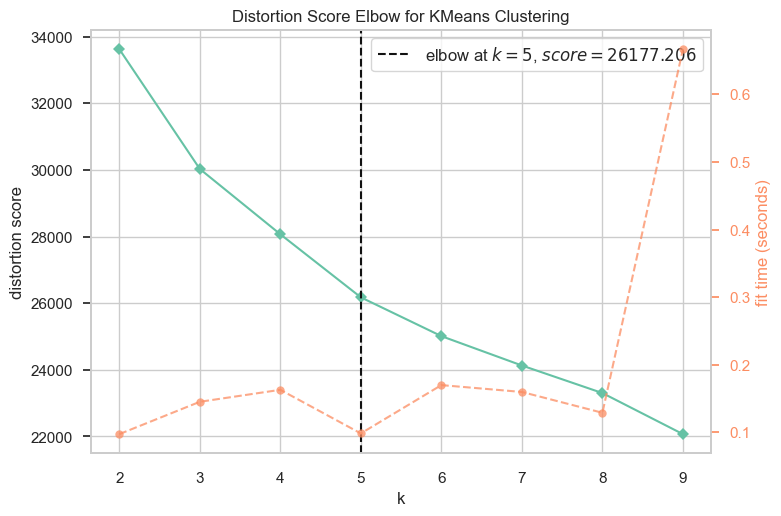

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [209]:
# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X_processed)        # Fit the data to the visualizer
visualizer.show()

We see that from k=5, the distortion does not vary drastically. It is true that the ideal is that the behavior starting from k= 5 would be almost flat. This rarely happens and other methods can be applied to be sure of the most optimal number of clusters. We can also examine other techniques to find the optimal number of clusters like those based on the silouhette score.

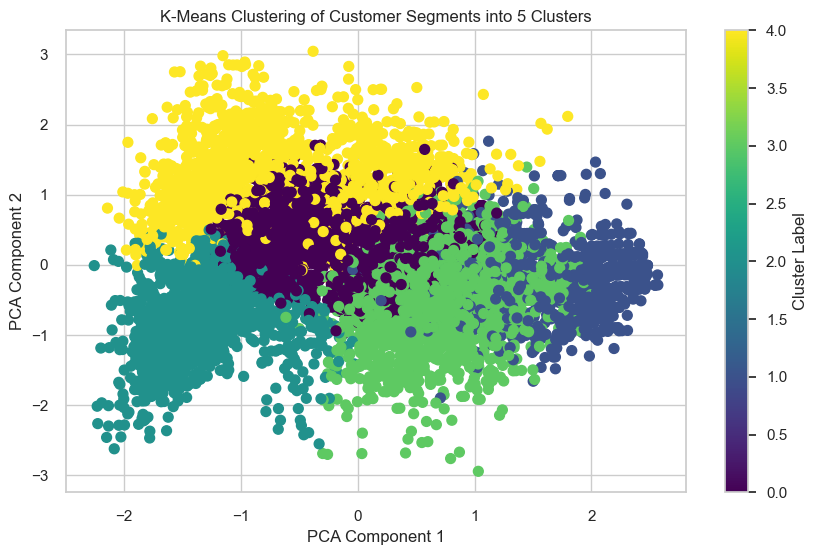

In [210]:
# Applying K-Means clustering
clusters_5= KMeans(n_clusters=5, random_state=42).fit_predict(X_processed)
# Plot the PCA with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_5, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Customer Segments into 5 Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

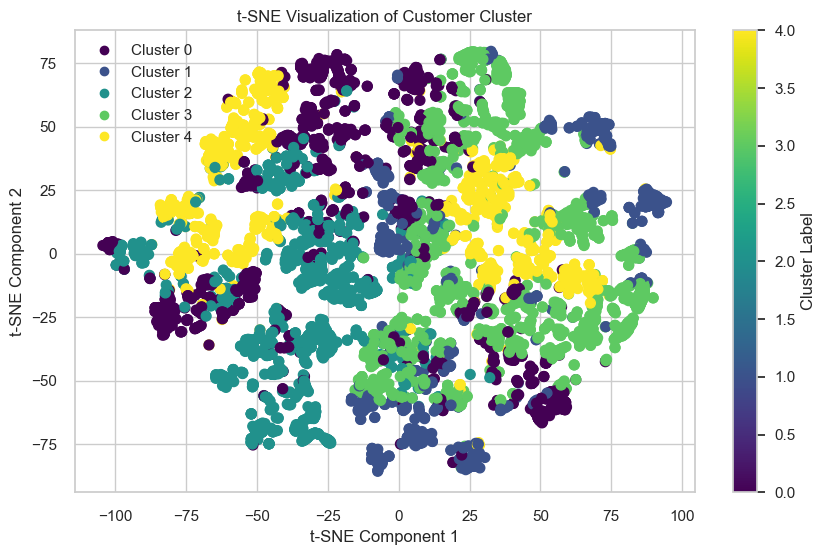

In [211]:
# Plot the t-SNE with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_5, cmap='viridis', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Customer Cluster')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(5)])
plt.colorbar(scatter, label='Cluster Label')
plt.show()

Evalute the new clusters

In [212]:
# Calculate Silhouette Score
sil_score = silhouette_score(X_processed, clusters_5)
print(f'Silhouette Score: {sil_score}')

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_processed, clusters_5)
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score: 0.139567391256026
Davies-Bouldin Index: 2.0222288824413863


The can notice the improvement in the evaluation metrics of the customer clusters. The Silhouette score has decreased passed from 0.15 to 0.14 and Davies-Bouldin Index have increased and passed from 1.99 to 2.O2

## 4.4 Analysing the impact of the new clustering on our classification problem



In the following, we will replace the old segmentation with the newly identified clusters on our training set. We won't be using the testing set since we didn't apply clustering on it. We then will fit a new multi-class classification model using SVM and evaluate its performances using cross validation on the training set. We are aiming to analyse the impact of the new clustering on the classification models.

In [213]:
df = train.copy()
df["new_segmentation"]= clusters_5
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,new_segmentation
0,466645,Male,Yes,66,Yes,Lawyer,5.0,Low,2.0,Cat_6,C,1
1,462521,Female,No,33,No,Homemaker,9.0,Low,1.0,Cat_6,A,4
2,461679,Male,No,28,Yes,Healthcare,4.0,Low,4.0,Cat_6,D,2
3,461644,Male,No,31,No,Healthcare,1.0,Low,6.0,Cat_6,B,2
4,461889,Male,Yes,42,Yes,Artist,2.0,Average,2.0,Cat_6,C,3


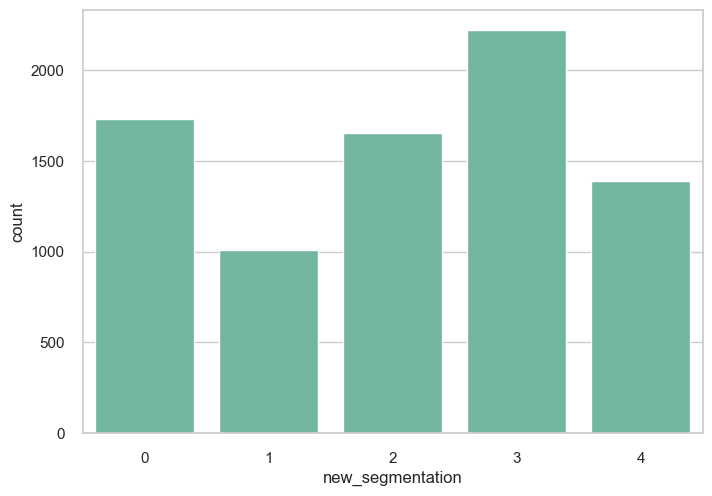

In [214]:
sns.countplot(data=df, x='new_segmentation')
plt.show()

In [215]:
Y=df['new_segmentation']
X=df.drop(['Segmentation', 'new_segmentation', 'ID'], axis=1)

In [216]:
# Define the number of principal components
n_components = 2
scoring = {'Accuracy': 'accuracy', 'F1_weighted':'f1_weighted', 'Precision_weighted': 'precision_weighted', 'Recall_weighted':'recall_weighted',
            'F1_macro':'f1_macro', 'Precision_macro': 'precision_macro', 'Recall_macro':'recall_macro'}

model_pipeline = Pipeline(steps=[
    ('graduation_correction', GraduationCorrectionTransformer()),
    ('cleaning', cleaning_transformer),
    ('encoding', encoder) ,
    ('classifier', SVC())
])

#stratified Kfold since we have a multi-class classification problem
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Fit the data using K-fold cross validation
scores = cross_validate(model_pipeline, X, Y, scoring=scoring, cv=skf)

scores= {metric: np.mean(scores[f'test_{metric}']) for metric in scoring.keys()}
print("Scores on Training data:\n")
for k,v in scores.items():
  print(f'{k} : {v:.2f}')

Scores on Training data:

Accuracy : 0.98
F1_weighted : 0.98
Precision_weighted : 0.98
Recall_weighted : 0.98
F1_macro : 0.97
Precision_macro : 0.98
Recall_macro : 0.97


### Interpretation of SVM Results with New Clustering

Initially, we evaluated the performance of various machine learning models, including SVM, on our original dataset using an imputation and encoding pipeline. The SVM model achieved the best results on the training set with the following metrics:

- **Accuracy**: 50.34%
- **F1 (weighted)**: 45.12%
- **Precision (weighted)**: 49.54%
- **Recall (weighted)**: 50.34%
- **F1 (macro)**: 39.32%
- **Precision (macro)**: 49.26%
- **Recall (macro)**: 41.46%

These results indicated that the initial customer segmentation was not informative and did not reflect the underlying data structure well. To address this, we applied K-means clustering to redefine the customer segments, and then replaced the old segmentation labels with the new cluster labels. Subsequently, we retrained the SVM model using the new clusters as the target variable.
The SVM model with the new clustering achieved significantly improved results:

- **Accuracy**: 98%
- **F1 (weighted)**: 98%
- **Precision (weighted)**: 98%
- **Recall (weighted)**: 98%
- **F1 (macro)**: 98%
- **Precision (macro)**: 98%
- **Recall (macro)**: 98%

These results suggest that the new clustering approach has substantially improved the quality of the segmentation. The high accuracy and consistent performance across all metrics indicate that the new clusters are much more coherent and distinguishable based on the features used. This significant improvement highlights that the initial segmentation did not align well with the data structure, whereas the new K-means clusters provide a more meaningful and separable segmentation of the customer data. Consequently, the SVM model performs exceptionally well in predicting these new clusters.

## 4.3 Saving the K-means clustering model

# Task 5. Conclusions and future improvements


In this notebook, we conducted a comprehensive analysis of the provided dataset to address the challenges of multi-class classification within the context of customer segmentation. Initially, we explored the data, conducted univariat and multi-variate analysis of the data features. We explored the missing data and suggested different imputation techniques, then we trained and compared different logistic regression models by combining different strategies to address both the missing data problem and the imbalance class problem. We also evaluated various machine learning models on our original dataset with imputation and encoding pipelines. The best performance was achieved by the SVM model with an accuracy of 50.34% and a weighted F1-score of 45.12%, indicating that the original customer segmentation was not well-aligned with the underlying data structure.

To address this, we employed K-means clustering to redefine the customer segments, replacing the old segmentation labels with new cluster labels. This approach significantly enhanced model performance, with the SVM model achieving an accuracy and weighted F1-score of 98%. These results demonstrate that the new clustering approach provided a more coherent and meaningful segmentation of the customer data, leading to substantial improvements in model performance. We still need to validate our finding by examining the performances of our final model on unseen data.

As future improvement, we have some suggestions :
- consult with domain experts to identify and incorporate features that capture the nuances used by human agents in customer segmentation.
- We can also create interaction features by combining existing ones, like age-groups, work_experience_age_ratio. These kind of features may reveal complex relationships between variables.
- It's also important to conduct a thorough hyperparameter tuning for the SVM and other models using techniques such as grid search or Bayesian optimization to fine-tune model performance.
- Explore other clustering algorithms like DBSCAN, Agglomerative Clustering, or Gaussian Mixture Models to see if they provide even better segmentation.
- Conduct additional visualizations and in-depth analyses of the new customer segments to provide marketing agents with clearer insights, enabling them to effectively utilize these segments for targeted marketing and other strategic initiatives.